In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from IPython.display import Markdown, display

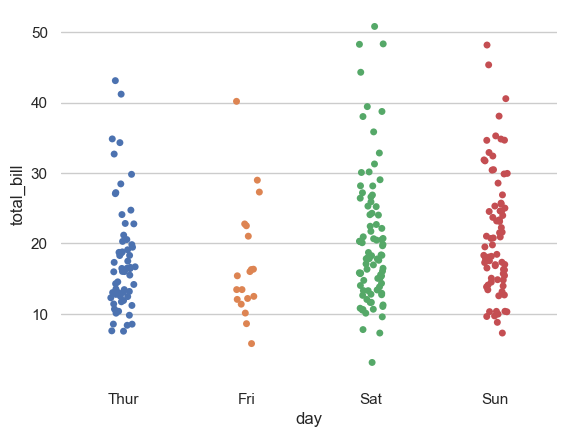

In [61]:
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
sns.stripplot(x="day", y="total_bill", data=tips)
sns.despine(left=True, bottom=True)

### 🎨 Custom `seaborn` palette

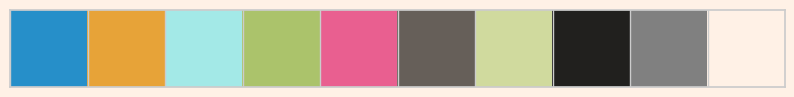

In [66]:
# Custom palette courtesy of FT graphics
custom_palette = ['#268fc9',  # blue
                  '#e7a338',  # yellow
                  '#a3e9e7',  # light blue
                  '#abc36b',  # green
                  '#e95f90',  # pink
                  '#665f59',  # brown
                  '#d0da9e',  # light green
                  '#21201e',  # off black
                  '#808080',  # label darker grey
                  '#fff1e6']  # background colour

#  ⟶ ───►

sns.set_palette(custom_palette)
display(Markdown("### 🎨 Custom `seaborn` palette"))
sns.palplot(sns.color_palette())

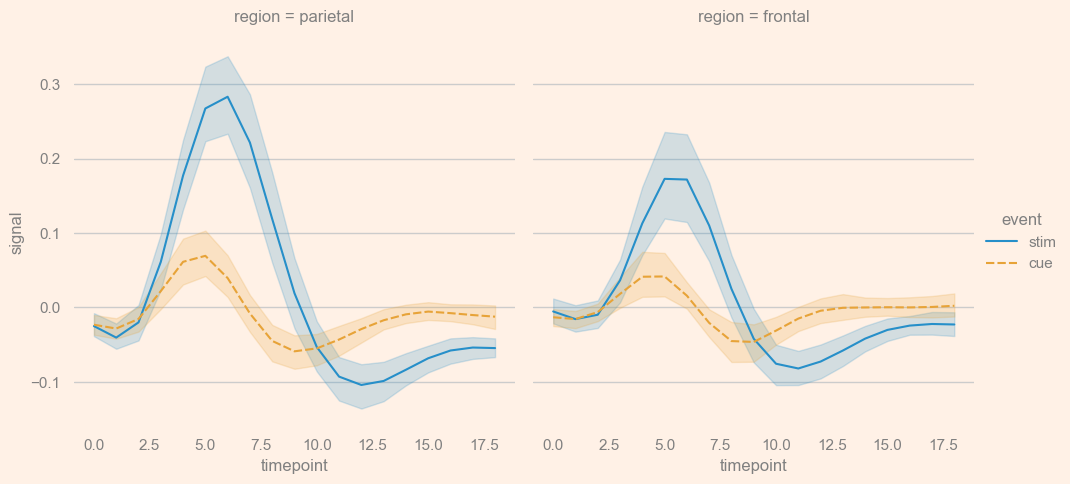

In [79]:
fmri = sns.load_dataset("fmri")

sns.set() # reset
sns.set_palette(custom_palette)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12  # Larger font size
plt.rcParams['font.family'] = 'sans-serif'  # Use 'sans-serif' family
plt.rcParams['font.sans-serif'] = 'Arial'  # Use 'Arial' as the first choice
plt.rcParams['text.color'] = '#808080'  # Gray color for all text
plt.rcParams['axes.labelcolor'] = '#808080'  # Gray color for x/y labels
plt.rcParams['axes.titlesize'] = 40  # Larger font size for the plot title
plt.rcParams['axes.titleweight'] = 300  # Bold font weight for plot title
plt.rcParams['axes.titlepad'] = 12  # Spacing between plot title and plot
plt.rcParams['xtick.color'] = '#808080'
plt.rcParams['ytick.color'] = '#808080'
plt.rcParams['figure.facecolor'] = '#fff1e6'
plt.rcParams['axes.facecolor'] = '#fff1e6'

g = sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

for ax in g.axes.flat:
    ax.grid(False, axis='x')  # This removes the vertical gridlines
sns.despine(left=True, bottom=True)

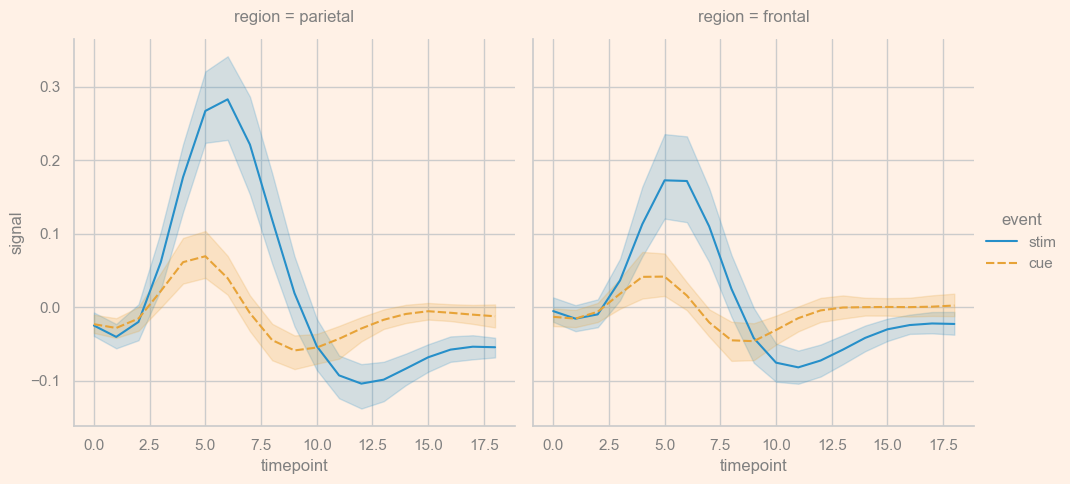

In [77]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
);

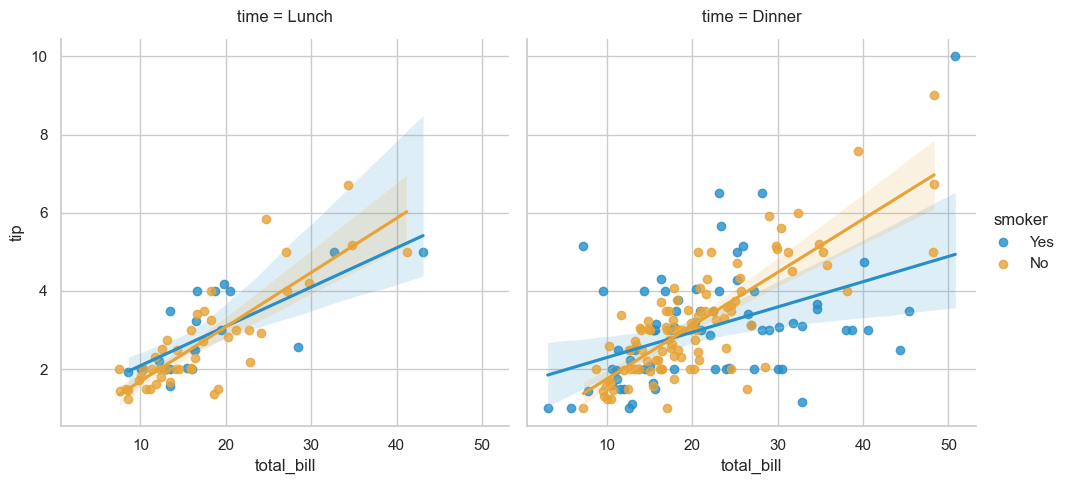

In [70]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

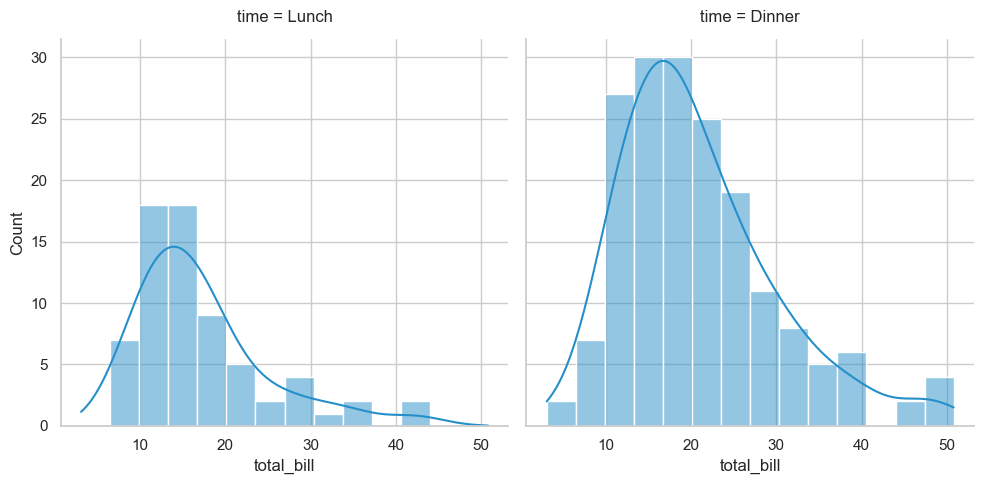

In [71]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

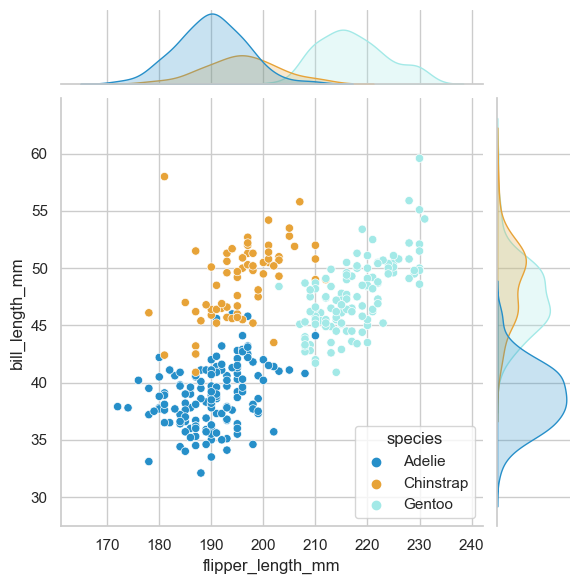

In [72]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

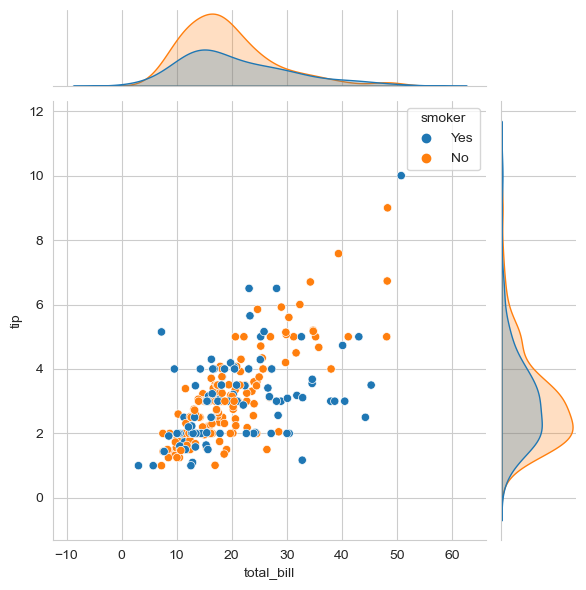

In [10]:
sns.jointplot(data=tips, x="total_bill", y="tip",  hue="smoker")

In [19]:
# Assuming you have calculated the confidence intervals and have them in a DataFrame `confidence_df`
# with columns 'x', 'y_lower', 'y_upper', and 'smoker'

# Altair chart for the scatter plot
points = alt.Chart(tips).mark_circle().encode(
    x='total_bill',
    y='tip',
    color='smoker'
)

# Altair chart for the confidence interval area
confidence_interval_area = alt.Chart(confidence_df).mark_area(opacity=0.3).encode(
    x='x',
    y='y_lower',
    y2='y_upper',
    color='smoker'
)

# Combine the points and the confidence interval area
alt.layer(confidence_interval_area, points)


NameError: name 'confidence_df' is not defined